In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("EV Maker by Place.csv")
df.head()

,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [29]:
print("Missing values:\n", df.isnull().sum())
df = df.drop_duplicates()
df.head()

Missing values:
 EV Maker    0
Place       0
State       0
dtype: int64


,EV Maker,Place,State
0,Tata Motors,Pune,Maharashtra
1,Mahindra Electric,Bengaluru,Karnataka
2,Ather Energy,Bengaluru,Karnataka
3,Hero Electric,New Delhi,Delhi
4,Ola Electric,Krishnagiri,Tamil Nadu


In [30]:
print("Dataset info:")
print(df.info())

print("\nSummary statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   EV Maker  61 non-null     object
 1   Place     61 non-null     object
 2   State     61 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB
None

Summary statistics:


,EV Maker,Place,State
count,61,61,61
unique,61,36,13
top,Tata Motors,Pune,Maharashtra
freq,1,7,15


In [31]:
metro_cities = ['New Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru', 'Hyderabad', 'Pune', 'Ahmedabad']

df['City-State Combined'] = df['Place'] + ", " + df['State']
df['Is Metro City'] = df['Place'].apply(lambda x: x in metro_cities)

df.head()


,EV Maker,Place,State,City-State Combined,Is Metro City
0,Tata Motors,Pune,Maharashtra,"Pune, Maharashtra",True
1,Mahindra Electric,Bengaluru,Karnataka,"Bengaluru, Karnataka",True
2,Ather Energy,Bengaluru,Karnataka,"Bengaluru, Karnataka",True
3,Hero Electric,New Delhi,Delhi,"New Delhi, Delhi",True
4,Ola Electric,Krishnagiri,Tamil Nadu,"Krishnagiri, Tamil Nadu",False


In [32]:
total_makers = df['EV Maker'].nunique()
print("Total unique EV makers:", total_makers)

top_states = df['State'].value_counts()
print("\nTop states with most EV makers:\n", top_states.head())

top_places = df['Place'].value_counts()
places_with_multiple = top_places[top_places > 1]
print("\nCities with more than one EV maker:\n", places_with_multiple)

Total unique EV makers: 61

Top states with most EV makers:
 State
Maharashtra    15
Tamil Nadu     11
Karnataka       6
Haryana         6
Gujarat         5
Name: count, dtype: int64

Cities with more than one EV maker:
 Place
Pune          7
Bengaluru     6
Chennai       5
New Delhi     3
Mumbai        3
Hyderabad     3
Bhiwadi       2
Faridabad     2
Coimbatore    2
Kolkata       2
Name: count, dtype: int64


In [33]:
makers_per_place = df.groupby('Place')['EV Maker'].count()
print("\nEV makers per place:\n", makers_per_place)


EV makers per place:
 Place
Ahmedabad        1
Ahmednagar       1
Akurdi           1
Alwar            1
Anantapur        1
Aurangabad       1
Baramati         1
Bengaluru        6
Bhiwadi          2
Bhuj             1
Chakan           1
Chennai          5
Coimbatore       2
Delhi            1
Dharuhera        1
Faridabad        2
Gurgaon          1
Gurugram         1
Halol            1
Hosur            1
Hyderabad        3
Jaipur           1
Kashipur         1
Kolkata          2
Krishnagiri      1
Manesar          1
Morbi            1
Mumbai           3
New Delhi        3
Pithampur        1
Pune             7
Rajkot           1
Ropar            1
Sriperumbudur    1
Thiruvallur      1
Uttarpara        1
Name: EV Maker, dtype: int64


In [34]:
makers_per_state = df.groupby('State')['EV Maker'].count().sort_values(ascending=False)
print("\nEV makers per state:\n", makers_per_state)


EV makers per state:
 State
Maharashtra       15
Tamil Nadu        11
Karnataka          6
Haryana            6
Gujarat            5
Rajasthan          4
Delhi              4
West Bengal        3
Telangana          3
Andhra Pradesh     1
Madhya Pradesh     1
Punjab             1
Uttarakhand        1
Name: EV Maker, dtype: int64


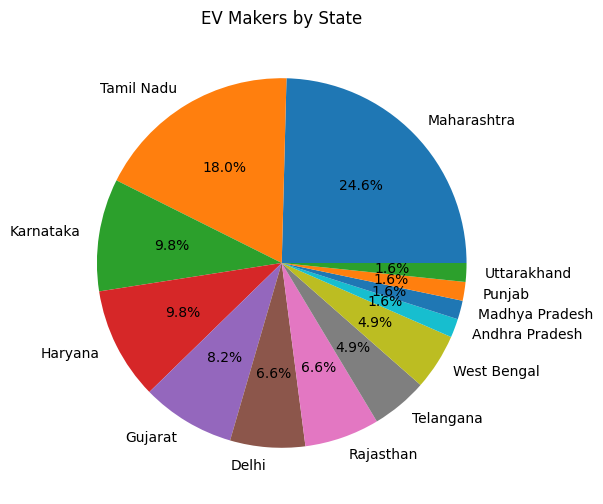

In [35]:
top_states.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='EV Makers by State')
plt.ylabel("")
plt.show()

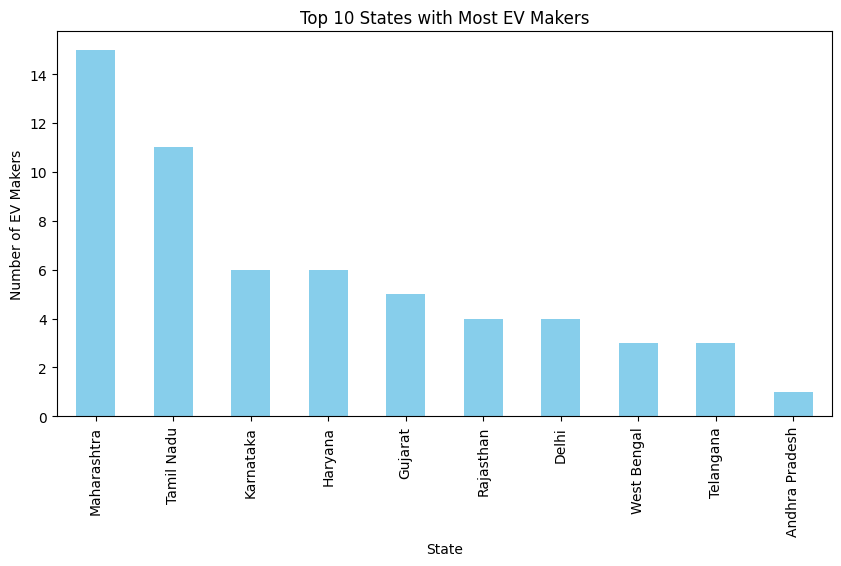

In [36]:
plt.figure(figsize=(10, 5))
makers_per_state.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 States with Most EV Makers')
plt.xlabel('State')
plt.ylabel('Number of EV Makers')
plt.show()

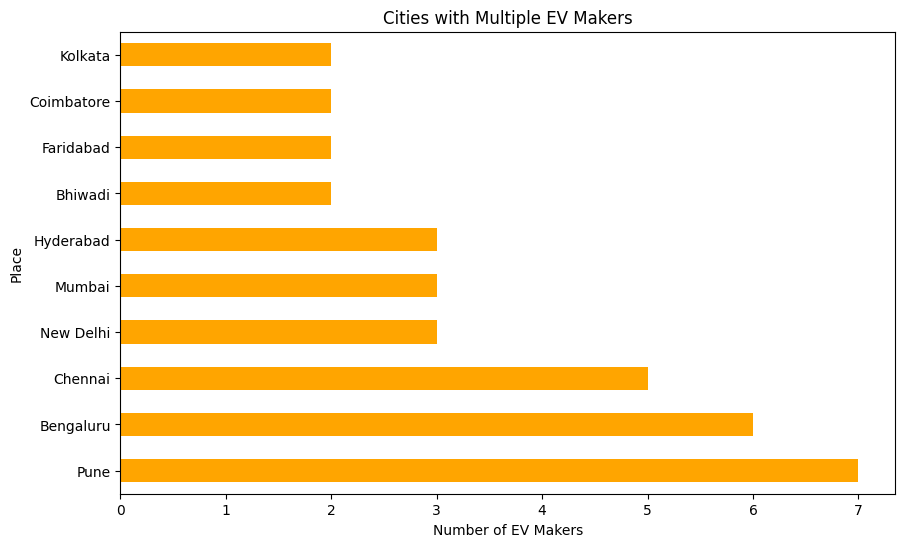

In [37]:
plt.figure(figsize=(10, 6))
places_with_multiple.plot(kind='barh', color='orange')
plt.title('Cities with Multiple EV Makers')
plt.xlabel('Number of EV Makers')
plt.show()

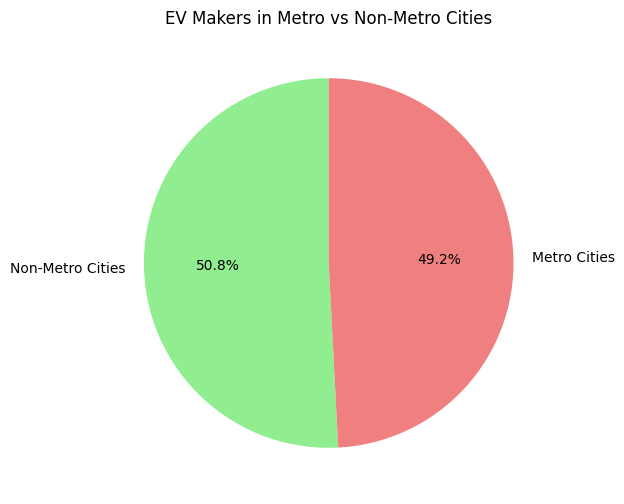

In [38]:
metro_counts = df['Is Metro City'].value_counts().rename({True: 'Metro Cities', False: 'Non-Metro Cities'})

# Plot
plt.figure(figsize=(6, 6))
metro_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title('EV Makers in Metro vs Non-Metro Cities')
plt.ylabel('')
plt.show()

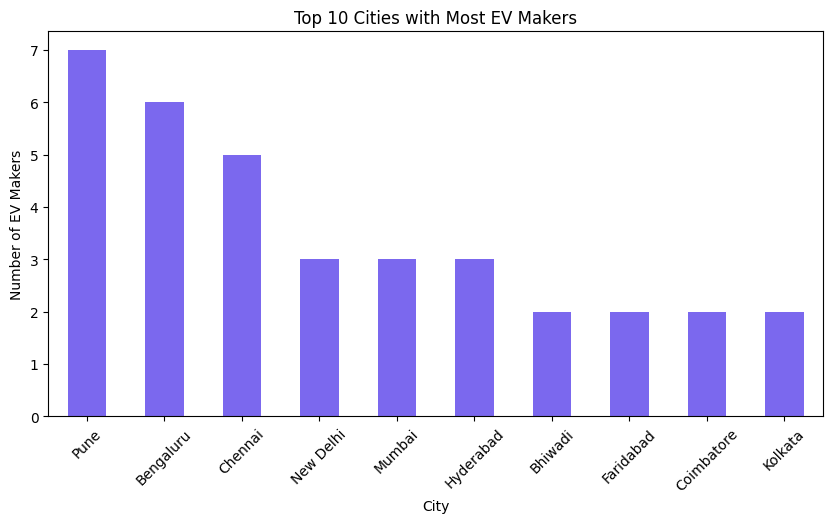

In [39]:
top_places = df['Place'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
top_places.plot(kind='bar', color='mediumslateblue')
plt.title('Top 10 Cities with Most EV Makers')
plt.xlabel('City')
plt.ylabel('Number of EV Makers')
plt.xticks(rotation=45)
plt.show()